In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
from sklearn.preprocessing import normalize


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import Normalizer


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
#import xgboost as xgb

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Importing the dataset

In [8]:
df = pd.read_csv(r'C:\Users\khush\Python, 12-7\Practice\Github\Obesity_risk_Project8\notebooks\data\ObesityDataSet.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Attributes
FAVC = Frequent consumption of high caloric food 

FCVC = Frequency of consumption of vegetables 

NCP = Number of main meals 

CAEC = Consumption of food between meals 

CH20 = Consumption of water daily 

CALC = Consumption of alcohol 

SCC = Calories consumption monitoring 

FAF = Physical activity frequency 

TUE = Time using technology devices 

MTRANS = Transportation used 

### Unique values in the categorical columns

In [3]:
for i in list(df.select_dtypes('object').columns):
    print(f'Unique value in {i} column is: [{df[i].unique()}]')
    print()

Unique value in Gender column is: [['Female' 'Male']]

Unique value in family_history_with_overweight column is: [['yes' 'no']]

Unique value in FAVC column is: [['no' 'yes']]

Unique value in CAEC column is: [['Sometimes' 'Frequently' 'Always' 'no']]

Unique value in SMOKE column is: [['no' 'yes']]

Unique value in SCC column is: [['no' 'yes']]

Unique value in CALC column is: [['no' 'Sometimes' 'Frequently' 'Always']]

Unique value in MTRANS column is: [['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']]

Unique value in NObeyesdad column is: [['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']]



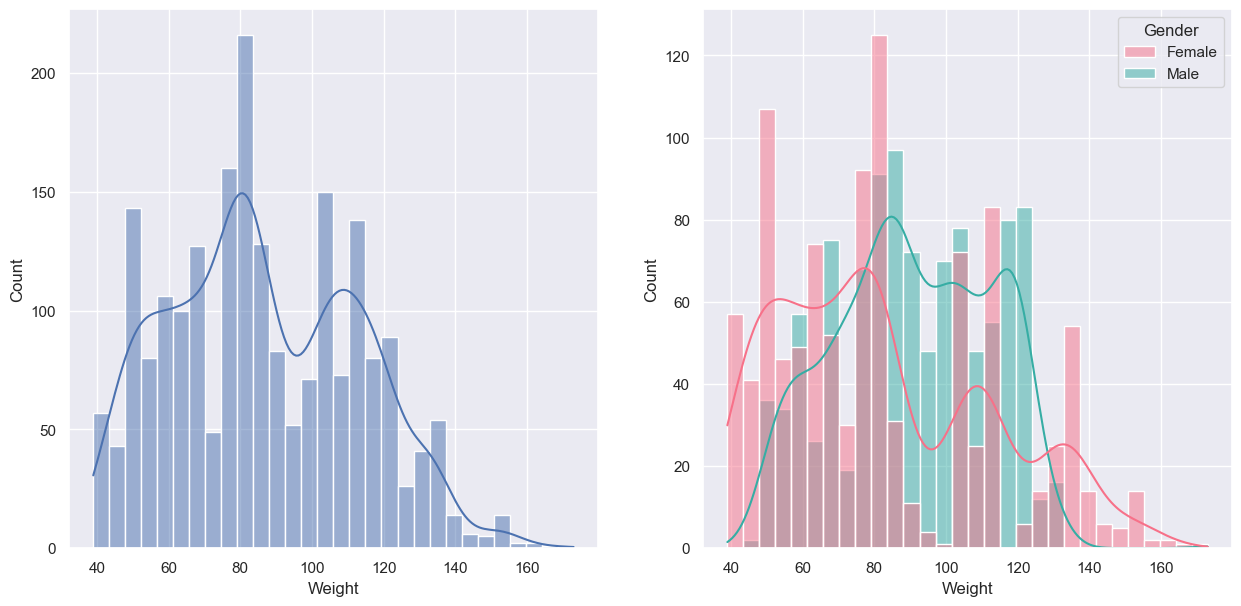

In [4]:
fig, axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'Weight',bins = 30,kde= True,palette= "husl")
plt.subplot(122)
sns.histplot(data = df, x = 'Weight',bins = 30, hue = 'Gender',kde= True,palette= "husl")
plt.show()

In [5]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [10]:
# Unique value in MTRANS column is: [['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']]
# Since we are only interested in walking and not walking, 
# as it is a health data, we can merge the values to walking and non walking in the column


# Pipeline

In [39]:
df1 = df.copy(deep = True)

In [40]:
#Function for MTRANS column

def MTRANS_map_Transformer(df):
    MTRANS_map = {'Public_Transportation' : 'Not Walking', 'Automobile' : 'Not Walking', 'Motorbike' : 'Not Walking', 'Bike' : 'Not Walking',"Walking" : 'Walking' }

    df['MTRANS'] = df['MTRANS'].map(MTRANS_map)
    encoder = {'Walking' : 1, 'Not Walking': 0 }
    df['MTRANS'] = df['MTRANS'].map(encoder)
    return df[['MTRANS']]

def CAEC_CALC_categories_map(df):
    CAEC_CALC_categories= {'no' : 0,'Sometimes' : 1, 'Frequently': 2 ,'Always':3}
    
    df['CAEC'] = df['CAEC'].map(CAEC_CALC_categories)
    df['CALC'] = df['CALC'].map(CAEC_CALC_categories)
    return df[['CAEC','CALC']]




#all_columns = list(df1.select_dtypes('object').columns)
all_columns = ['Gender', 'family_history_with_overweight', 'FAVC',  'SMOKE', 'SCC', 'NObeyesdad']
num_columns = list(df1.select_dtypes(exclude = 'O').columns)


preprocessor1 = ColumnTransformer(
                transformers = [
                    ('MTRANS Transformer',FunctionTransformer(MTRANS_map_Transformer), ['MTRANS'] ),
                    ('CAEC_CALC_categories_transformer', FunctionTransformer(CAEC_CALC_categories_map),['CAEC', 'CALC']),
                    ('OrdinalEncoder', OrdinalEncoder(),all_columns ),
                    ('StandardScaler', Normalizer(), num_columns)
                    
                ],remainder = 'passthrough'
)




pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor1),
    
    # Other steps in your pipeline, like model training, etc.
])

df3 = pipeline.fit_transform(df1)
df3 = pd.DataFrame(df3 ,columns = ['MTRANS'] + ['CAEC', 'CALC'] + all_columns+num_columns )
df3

,MTRANS,CAEC,CALC,Gender,family_history_with_overweight,FAVC,SMOKE,SCC,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.311064,0.023996,0.948005,0.029625,0.044438,0.029625,0.000000,0.014813
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.349258,0.025280,0.931355,0.049894,0.049894,0.049894,0.049894,0.000000
2,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.285648,0.022355,0.956301,0.024839,0.037258,0.024839,0.024839,0.012419
3,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,5.0,0.295878,0.019725,0.953386,0.032875,0.032875,0.021917,0.021917,0.000000
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,6.0,0.237783,0.019239,0.970586,0.021617,0.010808,0.021617,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,4.0,0.157513,0.012846,0.986730,0.022527,0.022527,0.012976,0.012587,0.006805
2107,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,4.0,0.162071,0.012892,0.986029,0.022118,0.022118,0.014783,0.009889,0.004418
2108,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,4.0,0.166014,0.012915,0.985360,0.022112,0.022112,0.015140,0.010423,0.004763
2109,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,4.0,0.179571,0.012821,0.982894,0.022113,0.022113,0.021025,0.008396,0.004320


In [42]:
print(df3.duplicated().sum())
df3.drop_duplicates(inplace = True)
print(df3.duplicated().sum())


24
0


In [44]:
df3.shape,df1.shape

((2087, 17), (2111, 17))

In [46]:
x = df3.drop(columns = ['NObeyesdad'])
y = df3['NObeyesdad']

In [47]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size = 0.25)

In [53]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
lr_model = lr.fit(xTrain,yTrain)
y_pred_test = lr_model.predict(xTest)
accuracy_lr_test = accuracy_score(y_pred_test, yTest)
accuracy_lr_train = accuracy_score(lr.predict(xTrain), yTrain)
print(f'Test Accuracy Score: {accuracy_lr_test}\nTrain Accuracy Score: {accuracy_lr_train}')

Test Accuracy Score: 0.5134099616858238
Train Accuracy Score: 0.5099041533546326


In [64]:
dt = DecisionTreeClassifier()
dt_model = dt.fit(xTrain,yTrain)
y_pred_test = dt_model.predict(xTest)
accuracy_dt_test = accuracy_score(y_pred_test, yTest)
accuracy_dt_train = accuracy_score(dt_model.predict(xTrain), yTrain)
print(f'Test Accuracy Score: {accuracy_dt_test}\nTrain Accuracy Score: {accuracy_dt_train}')

Test Accuracy Score: 0.8850574712643678
Train Accuracy Score: 1.0


In [54]:
rf = RandomForestClassifier()
rf_model = rf.fit(xTrain,yTrain)
y_pred_test = rf_model.predict(xTest)
accuracy_rf_test = accuracy_score(y_pred_test, yTest)
accuracy_rf_train = accuracy_score(rf_model.predict(xTrain), yTrain)
print(f'Test Accuracy Score: {accuracy_rf_test}\nTrain Accuracy Score: {accuracy_rf_train}')


Test Accuracy Score: 0.9521072796934866
Train Accuracy Score: 1.0


In [56]:
gbc = GradientBoostingClassifier()
gbc_model = gbc.fit(xTrain,yTrain)
y_pred_test = gbc_model.predict(xTest)
accuracy_gbc_test = accuracy_score(y_pred_test, yTest)
accuracy_gbc_train = accuracy_score(gbc_model.predict(xTrain), yTrain)
print(f'Test Accuracy Score: {accuracy_gbc_test}\nTrain Accuracy Score: {accuracy_gbc_train}')

Test Accuracy Score: 0.9367816091954023
Train Accuracy Score: 1.0


In [74]:
print(classification_report(y_pred_test,yTest))

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93        80
         1.0       0.79      0.78      0.79        73
         2.0       0.94      0.88      0.91        96
         3.0       0.97      0.97      0.97        72
         4.0       1.00      1.00      1.00        66
         5.0       0.78      0.79      0.79        78
         6.0       0.75      0.86      0.80        57

    accuracy                           0.89       522
   macro avg       0.88      0.89      0.88       522
weighted avg       0.89      0.89      0.89       522



In [76]:
confusion_matrix(y_pred_test,yTest)

array([[74,  6,  0,  0,  0,  0,  0],
       [ 5, 57,  0,  0,  0,  9,  2],
       [ 0,  0, 84,  2,  0,  3,  7],
       [ 0,  0,  2, 70,  0,  0,  0],
       [ 0,  0,  0,  0, 66,  0,  0],
       [ 0,  9,  0,  0,  0, 62,  7],
       [ 0,  0,  3,  0,  0,  5, 49]], dtype=int64)